# Python Bootcamp Day 4

## Multidimensions with xarray

### Instructors: Becca Baiman and Tina Geller

## Goals for the day
- Review arrays
- Understand multi-dimensional arrays
- Learn the basics of xarray

**As a reminder:** <br>
Text in black will be instruction and guidance and will usually start with a section number.<br>
<span style="color:blue"> Text in blue will be tasks to do.</span><br>
<span style="color:red"> Text in red will be optional challenges and advanced concepts.</span>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Reviewing two-dimensional arrays

Let's create a two-dimensional list:

In [ ]:
A = [[1, 2, 3, 4], ['fruit', 'fruit', 'vegetable','fruit'], ['apple', 'banana', 'carrot', 'pear']]

Remember, we can see the dimensions of A with `np.shape()`.

In [ ]:
np.shape(A)

(3, 4)

Knowing we have three rows and four columns, let's practice indexing. If we want just the names of the fruits and vegetables, we can index the whole last row.

In [ ]:
A[-1]
# Alternatively, you can write A[2]

['apple', 'banana', 'carrot', 'pear']

<span style="color:blue"> Change the above code to print out the `['fruit', 'fruit', 'vegetable','fruit']` row.</span><br>

In [ ]:
A[1]

['fruit', 'fruit', 'vegetable', 'fruit']

What if we want to index a specific value? Well, we'll need to add an extra index.

In [ ]:
A[-1][1]

'banana'

<span style="color:blue"> What do you think will be printed if we call A[0][2]? Write your answer here: </span>

3

<span style="color:blue"> Now try it out! </span>

In [ ]:
A[0][2]

3

#### Checkpoint: Arrays

The table below has rows and columns and represents a two-dimensional array. In each box there should be an index in the form of `(row index, col index)` and the corresponding value for that index from array `A`.
<br/> <br/> <span style="color:blue"> **Task:** On a piece of paper, fill out the remainder of the table.</span>

![Screen%20Shot%202021-05-26%20at%207.03.13%20PM.png](attachment:Screen%20Shot%202021-05-26%20at%207.03.13%20PM.png)

## Section 1: Multi-dimensional arrays

In many of our fields, we need to work with datasets that are multi-dimensional. A multi-dimensional array is essentially an array of arrays. It will therefore have more than two dimensions.

![Screen%20Shot%202021-05-26%20at%203.05.11%20PM.png](attachment:Screen%20Shot%202021-05-26%20at%203.05.11%20PM.png)

Using multi-dimensional arrays, we can look at variables over latitude, longitude, altitude/depth, and time.  These can be called coordinate variables because they are used to describe the variables of interest. 

Before we actually start working with multi-dimensional arrays, let's have a quick review of longitude and latitude.

### 1.1 Latitude and Longitude

Latitude (lat) serves as our y-axis. It runs North to South, with positive values being north of the equator and negative values south of the equator. Longitude (lon) serves as our x-axis. It runs West to East, with West being positive and East being negative.

![Screen Shot 2021-05-26 at 10.43.38 AM.png](attachment:316e5796-5b74-498a-a3ba-fd9fb9fba7ea.png)

Multi-dimensional arrays can be overwhelming at first, but they give us the ability to do a lot! 

Conveniently, there are powerful tools to loading and manipulating multi-dimensional arrays. We've already looked at `numpy`, which handles the manipulation of arrays wonderfully. As the name of this notebook implies, the tool we'll be looking at today is `xarray`, oftentimes abbreviated as `xr`. 

## Section 2: Introduction to xarray

Xarray uses labels provided in datasets to separate the data into named dimensions. As we will see, this make it easier to select and manipulate the data. It's also important to note that the package distinguishes between datasets and dataarrays. Dataarrays holds a single multi-dimensional variable and its coordinates. Datasets hold multiple variables that may share the same coordinates.
<br/> <br/> Let's start by importing xarray (in the future, this should be imported at the beginning of the notebook with our other packages).

In [ ]:
import xarray as xr

### 2.1 Read in data

We will use precipitation data obtained from satellite estimates and gauge data. The dataset includes monthly averaged precipitation rate values (mm/day). Please download the `precip.mon.mean.nc` file from the Drive Day 6/4.

Now we can load in a multi-dimensional array, giving it an arbitrary name (fname).

In [ ]:
fname = xr.open_dataset('precip.mon.mean.nc')

**Reminder:** When loading in a dataset, we must either specify the file path or have the file in our current working directory.

### 2.2 Inside the Dataset

Now that we have a file loaded in, we can look inside it.

In [ ]:
fname

<xarray.Dataset>
Dimensions:  (lat: 72, lon: 144, time: 508)
Coordinates:
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-04-01
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    Conventions:    COARDS
    title:          CPC Merged Analysis of Precipitation (excludes NCEP Reana...
    platform:       Analyses
    source:         ftp ftp.cpc.ncep.noaa.gov precip/cmap/monthly
    dataset_title:  CPC Merged Analysis of Precipitation
    documentation:  https://www.esrl.noaa.gov/psd/data/gridded/data.cmap.html
    date_modified:  26 Feb 2019
    References:     https://www.psl.noaa.gov/data/gridded/data.cmap.html
    version:        V2105
    history:        update 05/2021 V2105
    data_modified:  2021-05-11

The file has been broken down into four categories:
1. **Dimensions**
<br> Dimensions gives us information about the length of each dimension.
2. **Coordinates**
<br> Coordinates describe our variables. 
3. **Data variables**
<br> Our data variables are the data that we're interested in.
4. **Attributes**
<br> Attributes give us more information about the file itself. Briefly take a look through the attributes provided in this file.

<span style="color:blue"> **Task:** What is the long name of the data variable, `precip`? </span>

Average Monthly Rate of Precipitation

### 2.3 Browsing multi-dimensional arrays

Let's browse our datafile. It is important to recognize that these are "scratch" plots. They are great ways to look inside the data, but shouldn't be used as formal figures.

Two powerful xarray tools for browsing are `.isel` and `.sel`. 

Using `.isel`, we can use the coordinate **indices** to quickly look inside the data. Looking at our dataset, latitude goes from pole to pole (88.75 to -88.75). Let's use `.isel` to select the south pole. We will assume a longitude of 72.

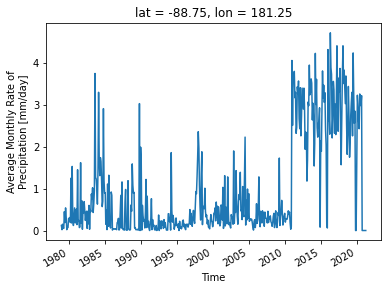

In [ ]:
fname['precip'].isel(lat=-1).isel(lon=72).plot(label='Polar');

 Using `.sel`, we can use the **coordinate value** at the index rather than the index itself. Let's use `.sel` to look at the mean monthly precipitation near the equator.

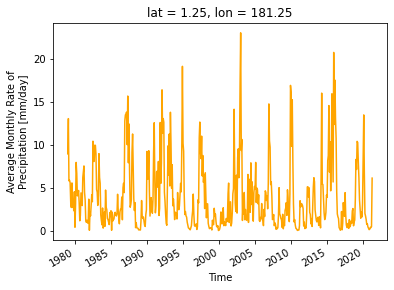

In [ ]:
fname['precip'].sel(lat=1.25).isel(lon=72).plot(label='Equator', color='orange');

We can also put them on the same figure to better compare the values.

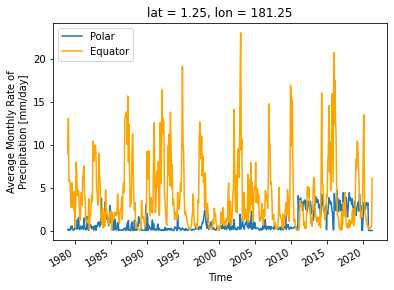

In [ ]:
fname['precip'].isel(lat=-1).isel(lon=72).plot(label='Polar');
fname['precip'].sel(lat=1.25).isel(lon=72).plot(label='Equator', color='orange');
plt.legend();

<span style="color:blue"> **Task:** Plot a time series of mean monthly precipitation at the north pole and a longitude of 76.25°. </span><br>

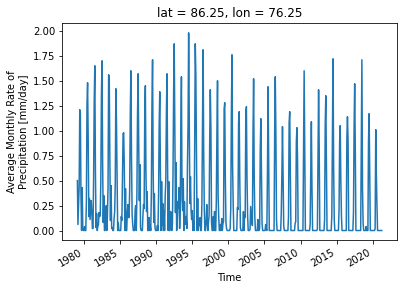

In [ ]:
fname['precip'].isel(lat=1).sel(lon=76.25).plot();

### 2.4 Manipulating multi-dimensional arrays

Tools we will use:
* `slice`
* `mean`
* `sum`
* `groupby`

For more information on xarray tools: http://xarray.pydata.org/en/stable/user-guide/index.html
<br/> For more information on xarray indexing: http://xarray.pydata.org/en/stable/user-guide/indexing.html

For convenience, we will store the precipitation data as it's own data array.

In [ ]:
precip = fname.precip

In [ ]:
precip

<xarray.DataArray 'precip' (time: 508, lat: 72, lon: 144)>
array([[[ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan],
        ...,
        [0.06, 0.06, ..., 0.05, 0.05],
        [0.08, 0.07, ..., 0.08, 0.07]],

       [[ nan,  nan, ...,  nan,  nan],
        [0.66, 0.69, ..., 0.65, 0.66],
        ...,
        [0.01, 0.01, ..., 0.01, 0.01],
        [0.01, 0.01, ..., 0.01, 0.01]],

       ...,

       [[ nan,  nan, ...,  nan,  nan],
        [0.  , 0.  , ..., 0.  , 0.  ],
        ...,
        [0.  , 0.  , ..., 0.  , 0.  ],
        [0.  , 0.  , ..., 0.  , 0.  ]],

       [[ nan,  nan, ...,  nan,  nan],
        [0.  , 0.  , ..., 0.  , 0.  ],
        ...,
        [0.  , 0.  , ..., 0.  , 0.  ],
        [0.  , 0.  , ..., 0.  , 0.  ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-04-01
Attributes:
    long_name:     Average Monthly Rate of Precipitation
    valid_range:   [ 0. 70.]
    units:         mm/day
    precision:     2
    var_desc:      Precipitation
    dataset:       CPC Merged Analysis of Precipitation Standard
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Mean
    actual_range:  [ 0.   59.08]

We can use `slice` to constrain the data and we can use `.mean` to average the data along the given dimension. Let's look at the average precipitation in 1995.

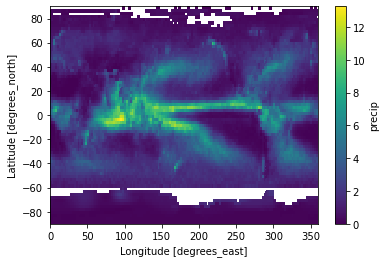

In [ ]:
precip_1995 = precip.sel(time=slice('1995-01-01','1995-12-01')).mean(dim='time').plot()

`.groupby` is another useful tool. It allows us to split the data into multiple groups, work within these groups, and combine them back into a single dataset. Let's group time by season:

In [ ]:
precip.groupby('time.season')

DataArrayGroupBy, grouped over 'season' 
4 groups with labels 'DJF', 'JJA', 'MAM', 'SON'.

The data has been divided into four seasons: 'DJF' (winter), 'JJA' (summer), 'MAM' (spring), and 'SON (fall).

Using `.sum`, we can sum over a given dimension. Combining groupby and sum, we can calculate the weighted averages.

In [ ]:
# Calculate the weights by grouping by 'time.season'.
weights = precip.groupby('time.season') / precip.groupby('time.season').sum()

# Calculate the weighted average
precip_weighted = (precip * weights).groupby('time.season').sum(dim='time')

<span style="color:blue"> **Task:** Plot the sum of precipitation over March, April, and May of 2005. </span><br>

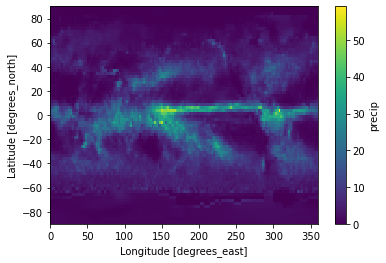

In [ ]:
precip_2005 = precip.sel(time=slice('2005-03-01','2005-05-01')).sum(dim='time').plot()

### 2.5 Xarray to numpy

Once again, numpy is a powerful tool. Therefore, it is to our benefit to be able to convert xarray datasets to numpy arrays. 
<br/> We can do this with `np.array()`.

In [ ]:
lat    = np.array(fname['lat'])
lon    = np.array(fname['lon'])
time   = np.array(fname['time'])
precip = np.array(fname['precip'])

To see a bit of the inner workings of the arrays, let's quickly loop through a couple iterations of the data. Because the data adds up quickly, we will just loop through 2 timestamps, 3 latitudes, and 4 longitudes.

In [ ]:
for k in range (0,2):
    print('Time: ', time[k])
    for i in range(0,3):
        print('  Lat: ', lat[i])
        for j in range(0,4):
            print('    Lon: ', lon[j], '    Precip:', precip[k,i,j])
    print('\n')

Time:  1979-01-01T00:00:00.000000000
  Lat:  88.75
    Lon:  1.25     Precip: nan
    Lon:  3.75     Precip: nan
    Lon:  6.25     Precip: nan
    Lon:  8.75     Precip: nan
  Lat:  86.25
    Lon:  1.25     Precip: nan
    Lon:  3.75     Precip: nan
    Lon:  6.25     Precip: nan
    Lon:  8.75     Precip: nan
  Lat:  83.75
    Lon:  1.25     Precip: nan
    Lon:  3.75     Precip: nan
    Lon:  6.25     Precip: nan
    Lon:  8.75     Precip: nan


Time:  1979-02-01T00:00:00.000000000
  Lat:  88.75
    Lon:  1.25     Precip: nan
    Lon:  3.75     Precip: nan
    Lon:  6.25     Precip: nan
    Lon:  8.75     Precip: nan
  Lat:  86.25
    Lon:  1.25     Precip: 0.66
    Lon:  3.75     Precip: 0.69
    Lon:  6.25     Precip: 0.66
    Lon:  8.75     Precip: 0.72
  Lat:  83.75
    Lon:  1.25     Precip: 0.6
    Lon:  3.75     Precip: nan
    Lon:  6.25     Precip: nan
    Lon:  8.75     Precip: nan




### 2.6: Breakout Room Activity

We will be looking at Northern Hemisphere snowcover data.

 <font color='blue'> Load in the snowcover data using xarray. </font>

In [ ]:
snow_data = xr.open_dataset('snowcover.mon.mean.nc')

 <font color='blue'> Look at the file. </font>

In [ ]:
snow_data

<xarray.Dataset>
Dimensions:    (lat: 90, lon: 360, time: 297)
Coordinates:
  * lat        (lat) float32 89.5 88.5 87.5 86.5 85.5 ... 4.5 3.5 2.5 1.5 0.5
  * lon        (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 1971-01-01 1971-02-01 ... 1995-09-01
Data variables:
    snowcover  (time, lat, lon) float32 ...
Attributes:
    title:          Northern Hemisphere EASE-Grid Snow Cover and Sea Ice Extent
    Conventions:    CF-1.2
    history:        created 10/20/2000 by CAS from data obtained from NSDIC. ...
    description:    Snow Cover extent derived from weekly values
    platform:       Observations
    References:     http://www.esrl.noaa.gov/psd/data/gridded/data.snowcover....
    dataset_title:  Northern Hemisphere EASE-Grid Snow Cover and Sea Ice Extent

 <font color='blue'> Use .sel to plot a map of snowcover on September 1, 1978. </font>

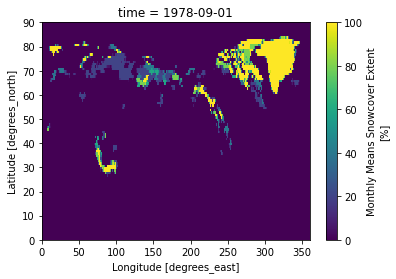

In [ ]:
snow_data['snowcover'].sel(time='1978-09-01').plot()

 <font color='blue'> Use .sel, slice, and .mean to plot the average snowcover  to plot a map of snowcover on September 1, 1978. </font>

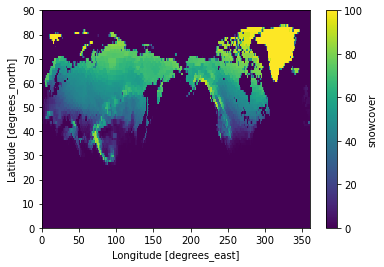

In [ ]:
snowco_1980s = snow_data['snowcover'].sel(time=slice('1980-01-01','1989-12-01')).mean(dim='time').plot()
